In [95]:
!pip install pandas matplotlib scipy numpy
import numpy as np
import pandas as pd


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [102]:
df = pd.read_csv('max_speed.csv')
df

,time,distance,delta_distance,delta_time,velocity
0,1.706798e+09,2.692,-0.193,0.198786,-0.970892
1,1.706798e+09,2.538,-0.154,0.199007,-0.773843
2,1.706798e+09,2.367,-0.171,0.198581,-0.861109
3,1.706798e+09,2.184,-0.183,0.198645,-0.921242
4,1.706798e+09,1.999,-0.185,0.198981,-0.929738
...,...,...,...,...,...
204,1.706798e+09,3.452,0.156,0.198928,0.784202
205,1.706798e+09,3.620,0.168,0.198707,0.845467
206,1.706798e+09,3.820,0.200,0.198921,1.005425
207,1.706798e+09,4.013,0.193,0.198925,0.970213


In [103]:
import pandas as pd

# Convert the time column from Unix epoch to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Calculate the relative seconds since start
df['relative_seconds'] = (df['time'] - df['time'].min()).dt.total_seconds()

# Display the updated dataframe
df


,time,distance,delta_distance,delta_time,velocity,relative_seconds
0,2024-02-01 14:37:49.896119118,2.692,-0.193,0.198786,-0.970892,0.000000
1,2024-02-01 14:37:50.096935511,2.538,-0.154,0.199007,-0.773843,0.200816
2,2024-02-01 14:37:50.297604799,2.367,-0.171,0.198581,-0.861109,0.401486
3,2024-02-01 14:37:50.498222828,2.184,-0.183,0.198645,-0.921242,0.602104
4,2024-02-01 14:37:50.699030161,1.999,-0.185,0.198981,-0.929738,0.802911
...,...,...,...,...,...,...
204,2024-02-01 14:38:44.473665714,3.452,0.156,0.198928,0.784202,54.577547
205,2024-02-01 14:38:44.674136162,3.620,0.168,0.198707,0.845467,54.778017
206,2024-02-01 14:38:44.874795675,3.820,0.200,0.198921,1.005425,54.978677
207,2024-02-01 14:38:45.075441599,4.013,0.193,0.198925,0.970213,55.179322


<Axes: xlabel='relative_seconds'>

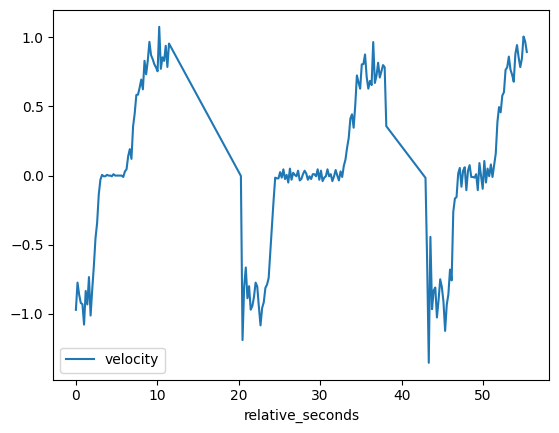

In [104]:
df.plot(x='relative_seconds', y='velocity')

In [105]:
# Multiply velocity by -1 since the sensor is measuring distance directly in front
df['velocity'] = df['velocity'] * -1

In [106]:
min_velocity = df['velocity'].min()
max_velocity = df['velocity'].max()
avg_velocity = df['velocity'].mean()

min_velocity, max_velocity, avg_velocity


(-1.0759420685951562, 1.3536882241501564, -0.029156411034367412)

<Axes: xlabel='relative_seconds'>

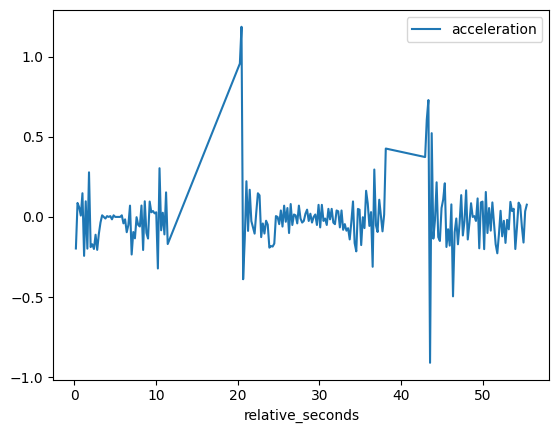

In [107]:
from scipy import stats
# Calculate the accelerations
df['acceleration'] = df['velocity'].diff()

# Create a new dataframe with only the time and acceleration columns
acceleration_df = df[['relative_seconds', 'acceleration']]

# Plot the acceleration dataframe
acceleration_df.plot(x='relative_seconds', y='acceleration')


In [112]:
import pandas as pd
import pandas as pd
# ros2 topic echo --csv /diff_drive_controller/cmd_vel_unstamped
# Read the CSV file
df2 = pd.read_csv('max_speed_cmd_vel.csv')

# Display the dataframe
df2

min_relative_time = df.iloc[0]['relative_seconds']
max_relative_time = df.iloc[-1]['relative_seconds']

# Calculate the scaling factor
scaling_factor = (max_relative_time - min_relative_time) / len(df2)

# Calculate the relative seconds for each row in df2
df2['relative_seconds'] = min_relative_time + (df2.index * scaling_factor)

# Display the updated dataframe
df2


,lin_x,lin_y,lin_z,ang_x,ang_y,ang_z,relative_seconds
0,0.26,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.26,0.0,0.0,0.0,0.0,0.0,0.089757
2,0.26,0.0,0.0,0.0,0.0,0.0,0.179514
3,0.26,0.0,0.0,0.0,0.0,0.0,0.269271
4,0.26,0.0,0.0,0.0,0.0,0.0,0.359029
...,...,...,...,...,...,...,...
612,-0.26,0.0,0.0,0.0,0.0,0.0,54.931381
613,-0.26,0.0,0.0,0.0,0.0,0.0,55.021138
614,-0.26,0.0,0.0,0.0,0.0,0.0,55.110895
615,-0.26,0.0,0.0,0.0,0.0,0.0,55.200652


In [113]:
import pandas as pd

# Merge the dataframes based on the closest relative_seconds
new_df = pd.merge_asof(df[['relative_seconds', 'velocity']], df2[['relative_seconds', 'lin_x']], on='relative_seconds')

# Display the new dataframe
new_df


,relative_seconds,velocity,lin_x
0,0.000000,0.970892,0.26
1,0.200816,0.773843,0.26
2,0.401486,0.861109,0.26
3,0.602104,0.921242,0.26
4,0.802911,0.929738,0.26
...,...,...,...
204,54.577547,-0.784202,-0.26
205,54.778017,-0.845467,-0.26
206,54.978677,-1.005425,-0.26
207,55.179322,-0.970213,-0.26


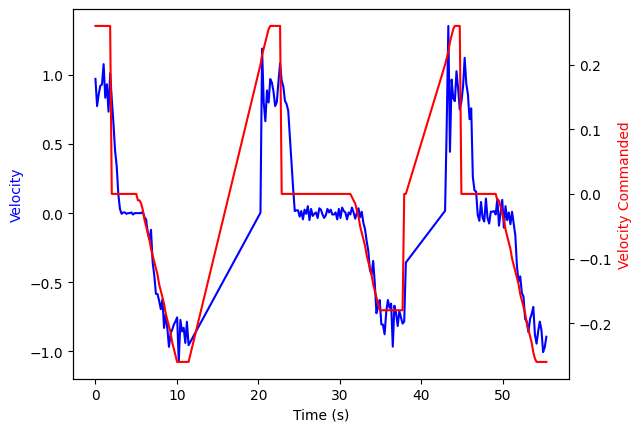

In [115]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(new_df['relative_seconds'], new_df['velocity'], color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity', color='blue')

ax2 = ax1.twinx()
ax2.plot(new_df['relative_seconds'], new_df['lin_x'], color='red')
ax2.set_ylabel('Velocity Commanded', color='red')

plt.show()
